In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import math as m
 
def rs(f1, f2, a):
    if (a > 0):
        return a * f1
    else:
        return a * f2
    
def minmod(a, b):
    if ((abs(a) <= abs(b)) & (a*b > 0)):
        return a
    elif (a*b > 0):
        return b
    else:
        return 0

def maxmod(a, b):
    return np.where((a*b > 0), np.where(((abs(a) >= abs(b)) & (a*b > 0)), a, b), 0)

def minmod_lim(u):
    return minmod(u[1:-1] - u[:-2], u[2:] - u[1:-1])

def superbee(u):
    return maxmod(minmod(u[2:] - u[1:-1], 2*(u[1:-1] - u[:-2])),
                             minmod(2*(u[2:] - u[1:-1]), u[1:-1] - u[:-2]))

In [2]:
def solver(u0, u_l, xl, xr, L, T, CFL, a, b):
    
    h = (xr - xl) / L 
    tau = h * CFL / a
    
    x = np.linspace(xl+h/2, xr-h/2, L)
    
    t = 0.
    
    # initial condition 
    u = u0(x)
    slope = np.zeros(L)
    tmp = np.zeros(L)
    ul = np.zeros(L+1)
    ur = np.zeros(L+1)
    Flow = np.zeros(L+1)
    RHS = np.zeros(L)
    
    def u_an(x, t):
        return u0(x - a * t) * np.exp(- b * t * np.ones(L))
    
    while(t < T):
        t += tau
        # boundary condition
        ul[0] = u_l(t)
        ur[L] = 0
        # reconstruction
        # compute slopes
        
        for i in range(1, L-1):
            slope[i] = h * minmod(u[i] - u[i-1], u[i+1] - u[i])
            
        for i in range(L):
            ur[i] = u[i] - (h / 2) * slope[i]
        
        for i in range(1, L+1):
            ul[i] = u[i-1] + (h / 2) * slope[i-1]
        
        # riemann solver - compute fluxes
        for i in range(L+1):
            Flow[i] = rs(ul[i], ur[i], a)
            
        # compute RHS
        for i in range(L):
            RHS[i] = (- Flow[i+1] + Flow[i]) / h - b * u[i]

        # update values
        #tmp[0] = u_l(t)
        for i in range(L):
            tmp[i] = u[i] + tau * RHS[i]
            
        u = tmp
        
    fig, ax = plt.subplots(figsize = (20,10))

    ax.plot(u, 'yo')
    ax.plot(u_an(x, T), 'k')
    print(np.linalg.norm(u - u_an(x, T), np.inf))
    return u

0.0012383734319105222


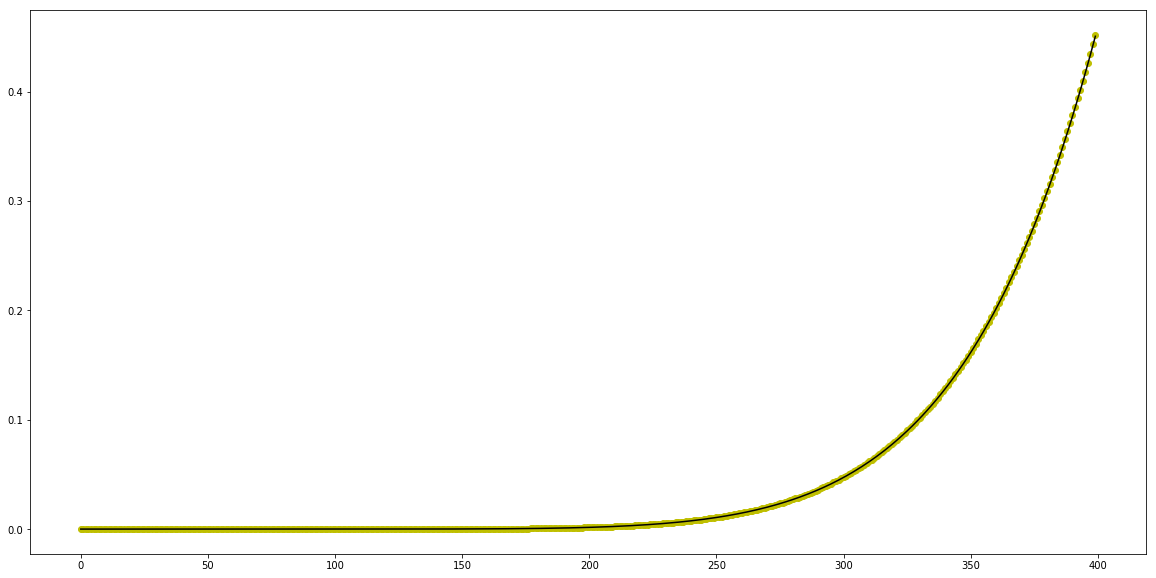

In [3]:
u0 = lambda x : np.where((x >= 0), x**7, 0.0)
#u0 = lambda x: np.where((x <= 0), 10., 20.)
u_l = lambda t: 0.
u = solver(u0 = u0, u_l = u_l, xl = 0., xr = 1., L = 400, T = 0.1, CFL = 0.5, a = 1., b = 0.5)